## Teoria współbieżności
### Laboratorium - Teoria śladów

*Dawid Majchrowski*

17.01.2019

In [1]:
# Przykładowe dane testowe
A = {'a', 'b', 'c', 'd'}
I = {('a', 'd'), ('d', 'a'), ('b', 'c'), ('c', 'b')}
w = "baadcb"

## Z-1 Wyznacza relację zależności D (2 p.)
Relacja zależności = Iloczyn kartezianski - relacja niezależnosci

In [2]:
from itertools import product

def D(A, I):
    return set(product(A,A)) - set(I)

In [3]:
D(A,I)

{('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'd'),
 ('c', 'a'),
 ('c', 'c'),
 ('c', 'd'),
 ('d', 'b'),
 ('d', 'c'),
 ('d', 'd')}

## Wyznacza ślad [w] względem relacji I (1 p.) 
Ślad [w] względem relacji I = wszystkie rózne możliwe transpozycje w dla par sąsiednich liter ze względu na relacje I

In [4]:
def trace(w, I):
    def _transpose(w, I, traces):
        if w in traces: 
            return
        traces.add(w)
        for i in range(len(w)-1):
            if (w[i], w[i+1]) in I:
                new_w = w[0:i] + w[i+1] + w[i] + w[i+2:]
                _transpose(new_w, I, traces)
    traces = set()
    _transpose(w,I,traces)
    return traces

In [5]:
trace(w,I)

{'baadbc', 'baadcb', 'badabc', 'badacb', 'bdaabc', 'bdaacb'}

## Wyznacza postać normalną Foaty FNF([w]) śladu [w] (2 p.)
Postać normalna wyznaczona za pomocą alg str. 10 rozdziału [Partial commutation and traces](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.38.4401&rep=rep1&type=pdf)

Dla ustawionego print_stacks = True wypisuje również stosy, z których alg korzysta

In [6]:
def foata_normal_form(A, I, w, print_stacks=True):
    piles = {x:[] for x in w}
    dependencies = D(A, I)
    for letter in w[::-1]:
        piles[letter].append(letter)
        neighbours = [x[1] for x in dependencies if x[0]==letter and x[1]!=letter]
        for neighbour in neighbours:
            piles[neighbour].append('*')
    if print_stacks:
        for key in sorted(piles):
            print('stack',key,'=', piles[key])
    foata = ''
    while max([len(pile) for pile in piles.values()]) > 0:
        cur = ''
        for key in sorted(piles):
            pile = piles[key]
            if len(pile) != 0 and pile[-1] != '*':
                letter = pile.pop()
                cur += letter
        if cur != '':
            for letter in cur:
                neighbours = [x[1] for x in dependencies if x[0]==letter and x[1]!=letter]
                for neighbour in neighbours:
                    piles[neighbour].pop()
            foata += f'({cur})'
            
    return foata

In [7]:
foata_normal_form(A,I,w)

stack a = ['*', '*', 'a', 'a', '*']
stack b = ['b', '*', '*', '*', 'b']
stack c = ['c', '*', '*', '*']
stack d = ['*', '*', 'd', '*']


'(b)(ad)(a)(bc)'

In [8]:
from graphviz import Digraph

# Rysowanie grafu

def create_digraph(graph, w):
    g = Digraph('G')
    for i in graph.keys():
        g.node(str(i),w[i])
    g.edges([str(i)+str(j) for i in graph.keys() for j in graph[i]])
    return g

## Wyznacza graf zależności w postaci minimalnej dla słowa w (3 p.)

Graf zależności w postaci minimalnnej = graf hassego (tranzytywny = bez zbędnych krawędzi przechodnich)

Alg = Stwórz graf zależności pełny (wszstkie krawędzie z D na prawo od odwiedzanego wierzchołka) następnie usuń tranzytywne krawędzie

In [9]:
def hasse(A,I,w):
    dependencies = D(A, I)
    full_graph = {
        i:[j for j in range(i+1,len(w)) if (w[i],w[j]) in dependencies]
        for i in range(len(w))
    }
    for i in range(len(w)-2):
        for n in full_graph[i]:
            for nn in full_graph[n]:
                if(nn in full_graph[i]):
                    full_graph[i].remove(nn)
    return full_graph

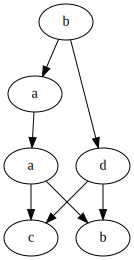

In [10]:
create_digraph(hasse(A,I,w), w)

## Wyznacza postać normalną Foaty na podstawie grafu (2 p.)

Postać normalna Foaty wyznaczona za pomocą algorytmu sortowania topologicznego 

(tzn iteracyjnie usuwane wszystkie wierzchołki o stopniu **wchodzących** równym 0)

In [11]:
from copy import deepcopy
from collections import Counter

def topological_sort(graph, w):
    g = deepcopy(graph)
    foata = ''
    while True:
        counter = Counter([j for i in g.values() for j in i])
        to_sort = [i for i in g.keys() if counter[i]==0]
        if(len(to_sort) == 0):
            return foata
        foata = foata + '(' + ''.join(sorted([w[i] for i in to_sort])) + ')'
        for i in to_sort:
            del g[i]

In [12]:
topological_sort(hasse(A,I,w), w)

'(b)(ad)(a)(bc)'

## Testy dla losowych 4 zbiorów danych

In [13]:
def run_tests(A, I, w):
    print('A =', A)
    print('I =', I)
    print('w =', w)
    print('D =', D(A,I))
    print('[w] =', trace(w,I))
    print('FNF([w], alg) = ', foata_normal_form(A,I,w, print_stacks=False))
    print('Hasse diagram = ')
    hass = hasse(A,I,w)
    graph = create_digraph(hass, w)
    print(graph)
    print('FNF([w], hasse) = ', topological_sort(hass, w))
    create_digraph(hass, w)
    return graph

A = {'c', 'd', 'b', 'a'}
I = {('b', 'c'), ('a', 'd'), ('c', 'b'), ('d', 'a')}
w = baadcb
D = {('a', 'c'), ('c', 'c'), ('b', 'b'), ('d', 'd'), ('a', 'b'), ('c', 'd'), ('d', 'c'), ('c', 'a'), ('a', 'a'), ('b', 'd'), ('d', 'b'), ('b', 'a')}
[w] = {'baadcb', 'baadbc', 'bdaacb', 'badacb', 'bdaabc', 'badabc'}
FNF([w], alg) =  (b)(ad)(a)(bc)
Hasse diagram = 
digraph G {
	0 [label=b]
	1 [label=a]
	2 [label=a]
	3 [label=d]
	4 [label=c]
	5 [label=b]
	0 -> 1
	0 -> 3
	1 -> 2
	2 -> 4
	2 -> 5
	3 -> 4
	3 -> 5
}
FNF([w], hasse) =  (b)(ad)(a)(bc)


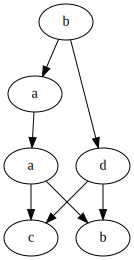

In [14]:
# Test 1
A = {'a', 'b', 'c', 'd'}
I = {('a', 'd'), ('d', 'a'), ('b', 'c'), ('c', 'b')}
w = "baadcb"

run_tests(A, I, w)

A = {'b', 'e', 'f', 'c', 'a', 'd'}
I = {('b', 'e'), ('d', 'a'), ('c', 'f'), ('c', 'd'), ('a', 'd'), ('d', 'c'), ('f', 'c'), ('e', 'b')}
w = acdcfbbe
D = {('f', 'a'), ('c', 'c'), ('b', 'b'), ('c', 'a'), ('a', 'f'), ('d', 'b'), ('c', 'b'), ('e', 'd'), ('a', 'c'), ('b', 'f'), ('b', 'c'), ('e', 'f'), ('f', 'e'), ('d', 'e'), ('e', 'c'), ('f', 'b'), ('e', 'a'), ('d', 'd'), ('c', 'e'), ('a', 'e'), ('b', 'd'), ('f', 'd'), ('e', 'e'), ('f', 'f'), ('a', 'b'), ('d', 'f'), ('a', 'a'), ('b', 'a')}
[w] = {'acdfcebb', 'acdcfbbe', 'dafccebb', 'daccfbeb', 'acdfcbbe', 'adfccebb', 'dafccbbe', 'adccfbeb', 'acdfcbeb', 'acdcfbeb', 'dafccbeb', 'daccfbbe', 'acdcfebb', 'accdfebb', 'dacfcbbe', 'adfccbeb', 'adcfcbeb', 'dacfcebb', 'daccfebb', 'adfccbbe', 'dacfcbeb', 'adcfcebb', 'accdfbbe', 'adccfbbe', 'adcfcbbe', 'accdfbeb', 'adccfebb'}
FNF([w], alg) =  (ad)(cf)(c)(be)(b)
Hasse diagram = 
digraph G {
	0 [label=a]
	1 [label=c]
	2 [label=d]
	3 [label=c]
	4 [label=f]
	5 [label=b]
	6 [label=b]
	7 [label=e]
	0 -> 1
	0

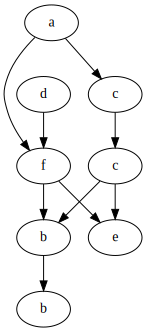

In [15]:
# Test 2 
A = {'a', 'b', 'c', 'd', 'e', 'f'}
I = {('a', 'd'), ('d', 'a'), ('b', 'e'), ('e', 'b'), ('c', 'd'), ('d', 'c'), ('c', 'f'), ('f', 'c')}
w = "acdcfbbe"
run_tests(A, I, w)

A = {'b', 'e', 'c', 'a', 'd'}
I = {('a', 'c'), ('b', 'e'), ('d', 'a'), ('e', 'b'), ('a', 'd'), ('c', 'a'), ('b', 'd'), ('d', 'b')}
w = acebdac
D = {('e', 'd'), ('e', 'a'), ('c', 'c'), ('b', 'b'), ('b', 'c'), ('d', 'd'), ('c', 'e'), ('e', 'e'), ('d', 'e'), ('a', 'b'), ('c', 'd'), ('e', 'c'), ('d', 'c'), ('a', 'a'), ('a', 'e'), ('c', 'b'), ('b', 'a')}
[w] = {'acebadc', 'acebdac', 'acbedac', 'cabeadc', 'caebdac', 'caebdca', 'cabedca', 'acbedca', 'cabedac', 'acebdca', 'caedbac', 'acedbca', 'caebadc', 'caedbca', 'acbeadc', 'acedbac'}
FNF([w], alg) =  (ac)(be)(ad)(c)
Hasse diagram = 
digraph G {
	0 [label=a]
	1 [label=c]
	2 [label=e]
	3 [label=b]
	4 [label=d]
	5 [label=a]
	6 [label=c]
	0 -> 2
	0 -> 3
	1 -> 2
	1 -> 3
	2 -> 4
	2 -> 5
	3 -> 5
	3 -> 6
	4 -> 6
}
FNF([w], hasse) =  (ac)(be)(ad)(c)


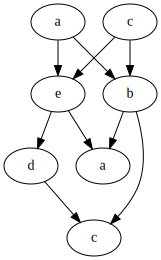

In [16]:
#Test 3
A = {'a', 'b', 'c', 'd', 'e'}
I = {('a', 'c'),
 ('a', 'd'),
 ('b', 'd'),
 ('b', 'e'),
 ('c', 'a'),
 ('d', 'a'),
 ('d', 'b'),
 ('e', 'b')}
w = "acebdac"
run_tests(A, I, w)

A = {'b', 'e', 'f', 'c', 'a', 'd'}
I = {('e', 'd'), ('d', 'a'), ('e', 'a'), ('b', 'c'), ('d', 'e'), ('c', 'd'), ('a', 'd'), ('d', 'c'), ('a', 'e'), ('b', 'd'), ('d', 'b'), ('c', 'b')}
w = abcadef
D = {('f', 'a'), ('c', 'c'), ('b', 'b'), ('c', 'f'), ('c', 'a'), ('a', 'f'), ('a', 'c'), ('b', 'f'), ('e', 'f'), ('f', 'e'), ('e', 'c'), ('f', 'b'), ('d', 'd'), ('c', 'e'), ('f', 'd'), ('b', 'e'), ('e', 'e'), ('f', 'f'), ('a', 'b'), ('d', 'f'), ('f', 'c'), ('a', 'a'), ('e', 'b'), ('b', 'a')}
[w] = {'dacbaef', 'acbedaf', 'dabcaef', 'acdbeaf', 'adcbeaf', 'acbdaef', 'acbaedf', 'acbadef', 'adcbaef', 'dabceaf', 'acbeadf', 'abdcaef', 'adbceaf', 'dacbeaf', 'abcdeaf', 'abcdaef', 'abceadf', 'abcedaf', 'acbdeaf', 'abdceaf', 'adbcaef', 'abcaedf', 'acdbaef', 'abcadef'}
FNF([w], alg) =  (ad)(bc)(ae)(f)
Hasse diagram = 
digraph G {
	0 [label=a]
	1 [label=b]
	2 [label=c]
	3 [label=a]
	4 [label=d]
	5 [label=e]
	6 [label=f]
	0 -> 1
	0 -> 2
	1 -> 3
	1 -> 5
	2 -> 3
	2 -> 5
	3 -> 6
	4 -> 6
	5 -> 6
}
FNF([w], hass

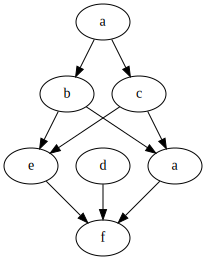

In [17]:
# Test 4
A = {'a', 'b', 'c', 'd', 'e', 'f'}
I = {('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('c', 'b'), ('c', 'd'), 
 ('d', 'a'), ('d', 'b'), ('d', 'c'), ('d', 'e'),('e', 'a'), ('e', 'd')}
w = "abcadef"
run_tests(A, I, w)

Kod projektu
